# Data Preparation

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('used_cars_data_v3.csv')
df['back_legroom'] = pd.to_numeric(df['back_legroom'].str.replace(' in', ''), errors='coerce')
df['front_legroom'] = pd.to_numeric(df['front_legroom'].str.replace(' in', ''), errors='coerce')
df['fuel_tank_volume'] = pd.to_numeric(df['fuel_tank_volume'].str.replace(' gal', ''), errors='coerce')
df['height'] = pd.to_numeric(df['height'].str.replace(' in', ''), errors='coerce')
df['length'] = pd.to_numeric(df['length'].str.replace(' in', ''), errors='coerce')
df['wheelbase'] = pd.to_numeric(df['wheelbase'].str.replace(' in', ''), errors='coerce')
df['width'] = pd.to_numeric(df['width'].str.replace(' in', ''), errors='coerce')
df['power'] = df['power'].str.extract('(\d+)').fillna(0).astype(int)
df['torque'] = df['torque'].str.extract('(\d+)').fillna(0).astype(int)

In [ ]:
# replace NaN values in fleet, frame_damaged, isCab, salvage, theft_title with false
bool_cols = ['fleet', 'frame_damaged', 'isCab', 'salvage', 'theft_title']
for col in bool_cols:
  df[col] = df[col].fillna(False)

/var/folders/__/xjk366sx01q2mmm4b5z1t0y00000gn/T/ipykernel_71627/2224772309.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False)


In [ ]:
df = df.drop(columns=['horsepower', 'engine_type', 'transmission', 'franchise_make', 'fuel_type', 'fleet', 'frame_damaged', 'isCab', 'salvage', 'theft_title', 'is_new', 'maximum_seating'])

In [ ]:
df.dtypes
# body_type                object
# listing_color            object
# make_name                object
# wheel_system             object


back_legroom            float64
body_type                object
city_fuel_economy       float64
daysonmarket              int64
engine_displacement     float64
franchise_dealer           bool
front_legroom           float64
fuel_tank_volume        float64
height                  float64
highway_fuel_economy    float64
latitude                float64
length                  float64
listing_color            object
longitude               float64
make_name                object
mileage                 float64
owner_count             float64
power                     int64
price                   float64
torque                    int64
wheel_system             object
wheelbase               float64
width                   float64
year                      int64
dtype: object

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


## One-hot encoding

In [ ]:
# Ref: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
selected_columns = df.select_dtypes(include=['bool', 'object'])
# Get the column names
column_names = selected_columns.columns.tolist()
# Perform one-hot encoding
one_hot_encoded_data = pd.get_dummies(df, columns=column_names)
print(one_hot_encoded_data.columns.tolist())
print(one_hot_encoded_data.dtypes)

['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'latitude', 'length', 'longitude', 'mileage', 'owner_count', 'power', 'price', 'torque', 'wheelbase', 'width', 'year', 'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon', 'franchise_dealer_False', 'franchise_dealer_True', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN', 'listing_color_WHITE', 'listing_color_YELLOW', 'make_name_AM General', 'make_name_AMC', 'make_name_Acura', 'make_name_Alfa Romeo', 'make_name_Allard', 'make_name_Ariel', 'make_name_Aston 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [ ]:
one_hot_encoded_data.columns[one_hot_encoded_data.isna().any()].tolist()

['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'length',
 'mileage',
 'owner_count',
 'wheelbase',
 'width']

In [ ]:
specific_columns = ['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'length',
 'mileage',
 'owner_count',
 'wheelbase',
 'width']
data_types = one_hot_encoded_data[specific_columns].dtypes
data_types

back_legroom            float64
city_fuel_economy       float64
engine_displacement     float64
front_legroom           float64
fuel_tank_volume        float64
height                  float64
highway_fuel_economy    float64
length                  float64
mileage                 float64
owner_count             float64
wheelbase               float64
width                   float64
dtype: object

In [ ]:
# Define the specific columns
specific_columns = ['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'length',
 'mileage',
 'owner_count',
 'wheelbase',
 'width']

# Calculate the mean of each selected column
column_means = one_hot_encoded_data[specific_columns].mean()

# Replace null values in each selected column with its respective mean
one_hot_encoded_data[specific_columns] = one_hot_encoded_data[specific_columns].fillna(column_means)

In [ ]:
# Check if there are any null values left
print(one_hot_encoded_data.isnull().any().tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

# Exploratory Data Analysis

## Numerical Data Visualizations

Mileage vs. Price

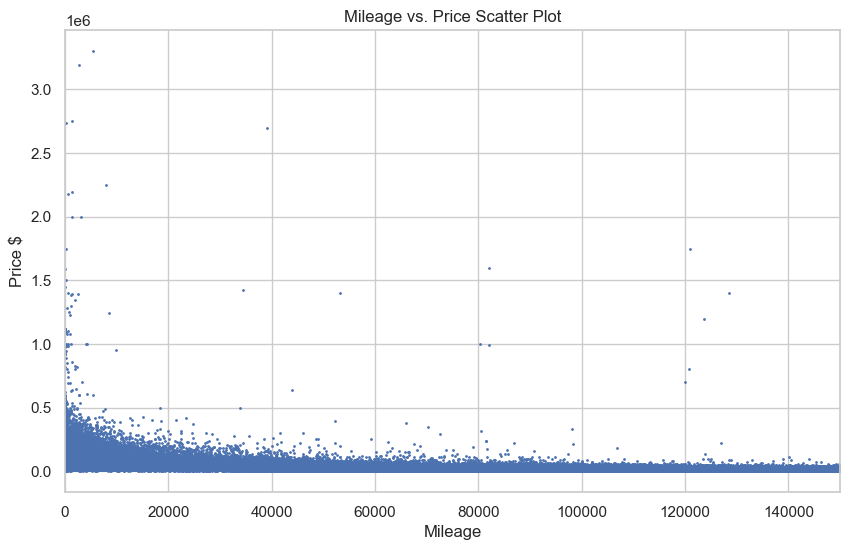

In [ ]:
# Mileage

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Plot mileage vs. price
plt.scatter(df['mileage'], df['price'], s=1)
# Customize the plot
plt.title('Mileage vs. Price Scatter Plot')
plt.xlabel('Mileage')
plt.ylabel('Price $')

plt.xlim(0, 150000) # limits x axis
# Show the plot
plt.show()

Owner Count vs. Price

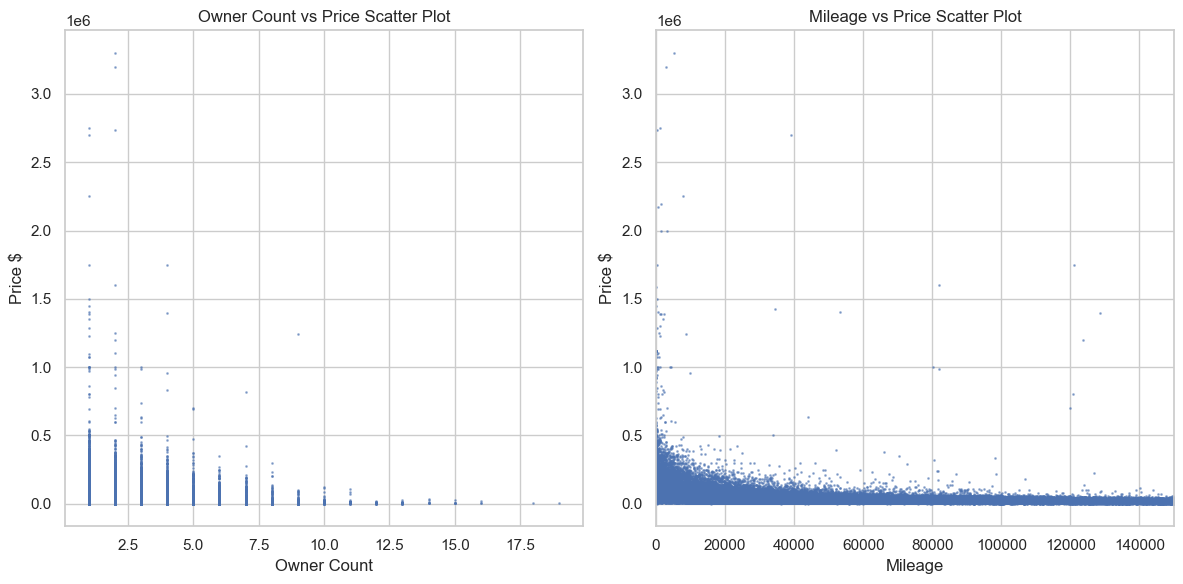

In [ ]:
# Create a 1x2 subplot grid
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Subplot 1: Owner count vs price scatter plot
axes[0].scatter(df['owner_count'], df['price'], alpha=0.5, s=1)
axes[0].set_title('Owner Count vs Price Scatter Plot')
axes[0].set_xlabel('Owner Count')
axes[0].set_ylabel('Price $')

# Subplot 2: Seller rating vs price scatter plot
axes[1].scatter(df['mileage'], df['price'], alpha=0.5, s=1)
axes[1].set_title('Mileage vs Price Scatter Plot')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('Price $')
axes[1].set_xlim(0,150000)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Categorical Data Visualizations

Body Type

<Axes: ylabel='count'>

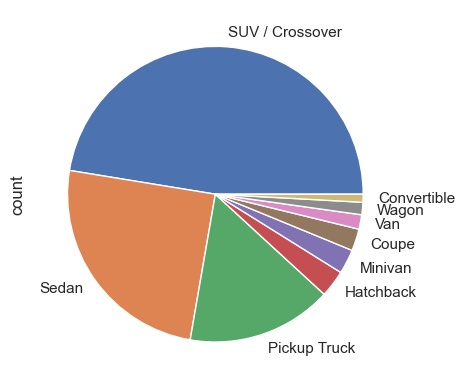

In [ ]:
df['body_type'].value_counts().plot(kind='pie')

Wheel System (or Drivetrain)

<Axes: xlabel='wheel_system'>

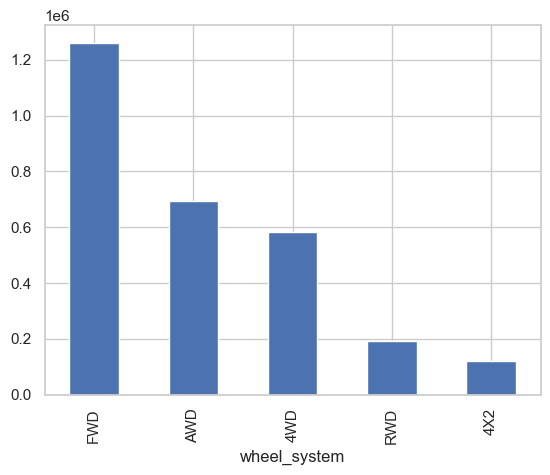

In [ ]:
df['wheel_system'].value_counts().plot(kind='bar')

# Linear Regression (Baseline)

In [ ]:
# Code reference link: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# Create a new dataframe with only the training data
# Drop non-numeric columns (temporary approach for simplicity)
df_numeric = df.select_dtypes(include = ['float64', 'int64'], exclude=['object'])
# print(df_numeric.dtypes)
print(df_numeric.columns.to_list())
# Extracting y (dependent variable)
y = df_numeric["price"]

df_numeric = df.drop('price', axis=1)
one_hot_encoded_data = one_hot_encoded_data.drop('price', axis=1)
# print(df_numeric)
print(one_hot_encoded_data.columns.to_list())
# numeric_columns = list(df_numeric.columns.tolist())
one_hot_columns = list(one_hot_encoded_data.columns.tolist())
X = one_hot_encoded_data

print(X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

print(X_train.head())

# # Train the model on the training data
model = LinearRegression().fit(X_train, y_train)

# # Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'latitude', 'length', 'longitude', 'mileage', 'owner_count', 'power', 'price', 'torque', 'wheelbase', 'width', 'year']
['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'latitude', 'length', 'longitude', 'mileage', 'owner_count', 'power', 'torque', 'wheelbase', 'width', 'year', 'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon', 'franchise_dealer_False', 'franchise_dealer_True', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 

array([21361.49781703, 37661.56576754, 11996.04510154, ...,
        1039.42321445, 53145.24851545, 10422.86292539])

## Evaluations

### Intercept and Coefficients

In [ ]:
# Ref: https://realpython.com/linear-regression-in-python/
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


intercept: -1389550.4049814704
slope: [ 4.91432294e+02  3.72433765e+02  6.58791252e+00  2.63702883e+00
  2.20904411e+02  2.63858258e+02  1.10098460e+02 -4.70066404e+02
 -5.55193716e+01  2.60393539e+02 -3.37063852e+01 -1.39510153e-01
  3.46439727e+02 -7.62156882e+00  9.71373969e+00 -2.38828381e+02
  2.91929363e+01  7.10233193e+02  1.07233805e+04  1.01400916e+04
  2.30625650e+03 -1.87986163e+03 -2.68996720e+03 -4.88376984e+02
 -1.37443654e+03 -6.88525638e+03 -4.50489988e+02 -1.61687696e+03
  1.61687696e+03 -5.18899342e+02 -8.74484799e+02 -3.01713329e+02
 -1.19961854e+03 -1.09477301e+03  1.47116480e+03 -3.09211829e+01
  4.77990987e+03  6.76970242e+02 -5.52679245e+02 -1.61003526e+03
 -1.99528138e+03 -1.84340878e+01 -8.13767157e+02  2.08256242e+03
 -1.60135588e+04 -4.25586954e+04 -6.82431432e+04 -6.18911409e+04
 -6.54836185e-11 -6.40534644e+04  5.05711359e+04 -5.84213196e+04
 -4.79485607e-09 -2.48118410e+04 -5.83433812e+04  6.70951475e+03
 -1.05501385e-09  1.10991076e+06 -7.42469902e+04 -6.

### Coefficient of determination (R^2)

In [ ]:
# Code reference link: https://realpython.com/linear-regression-in-python/
r_sq = model.score(X_test, y_test)
print(f"Coefficient of determination: {r_sq}")

Coefficient of determination: 0.33815353818342864


### Mean Squared Error (MSE)

In [ ]:
# Code reference link: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

MSE = metrics.mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 256894726.68472502


### Mean Absolute Error (MAE)

In [ ]:
# Code reference link: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {MAE}")

Mean Absolute Error: 6029.5757984776865


### Root Mean Squared Error (RMSE)

In [ ]:
# Code reference link: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error: {RMSE}")

Root Mean Squared Error: 16027.935821082046


## Visualizations

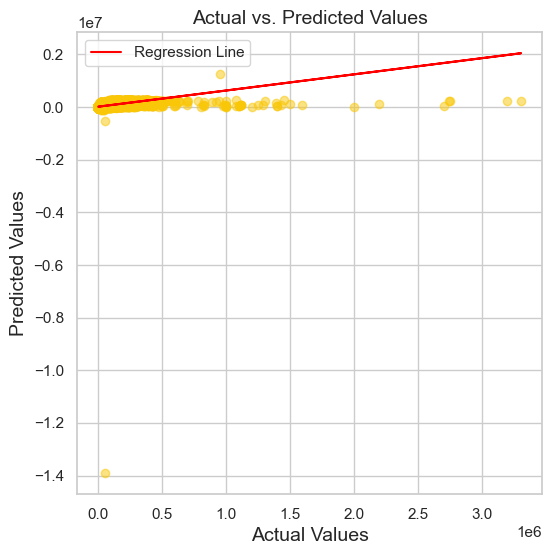

In [ ]:
# Code reference link: https://stackoverflow.com/questions/58663739/reshape-your-data-either-using-array-reshape-1-1-if-your-data-has-a-single-fe
# Code reference link: https://seaborn.pydata.org/tutorial/aesthetics.html
# Code reference link: https://www.w3schools.com/python/matplotlib_scatter.asp

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Convert Pandas Series to NumPy array
y_test_np = y_test.values

# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(y_test_np.reshape(-1, 1), y_pred)

# Set the style to whitegrid
sns.set(style="whitegrid")

# Plot actual vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='#F9C707')
# Plot the regression line
plt.plot(y_test, regression_model.predict(y_test_np.reshape(-1, 1)), color='red', label='Regression Line')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=14)
plt.legend()
plt.show()


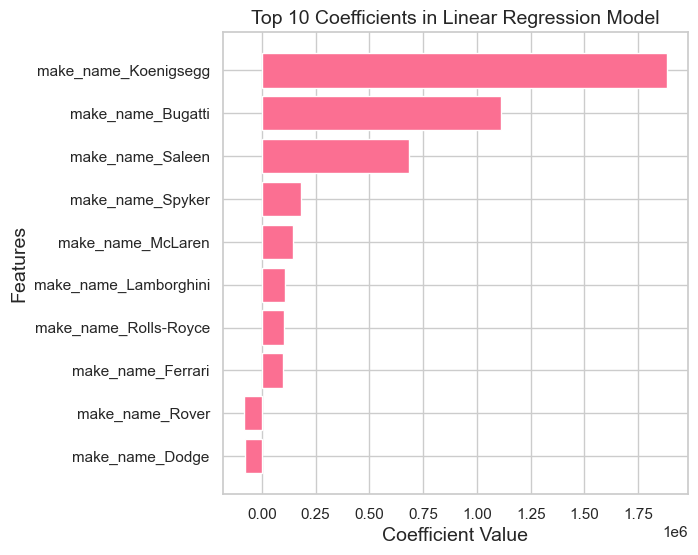

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients
coefficients = model.coef_

# Rank and select top 10 coefficients
top_indices = np.argsort(np.abs(coefficients))[-10:]
top_coefficients = coefficients[top_indices]
top_feature_names = np.array(one_hot_encoded_data.columns.tolist())[top_indices]

# Plot the coefficients
plt.figure(figsize=(6, 6))
plt.barh(range(10), top_coefficients, color='#fb6f92')
plt.yticks(range(10), top_feature_names)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Coefficients in Linear Regression Model', fontsize=14)
plt.show()

# Ridge Regression

## Model and Evaluations (All Columns)

### Model and Evaluations (alpha = 1)

In [ ]:
# # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# # train
# model = Ridge(alpha=1, random_state=42)
# model.fit(X_train, y_train)

# # predictions
# y_pred = model.predict(X_test)
# y_pred

#### Coefficient of determination (R-squared)

In [ ]:
# # Ref: https://realpython.com/linear-regression-in-python/
# r_sq = model.score(X_test, y_test)
# print(f"Coefficient of determination: {r_sq}")

#### Mean Squared Error (MSE)

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MSE = metrics.mean_squared_error(y_test,y_pred)
# print(f"Mean Squared Error: {MSE}")

#### Mean Absolute Error (MAE)

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MAE = metrics.mean_absolute_error(y_test,y_pred)
# print(f"Mean Absolute Error: {MAE}")

#### Root Mean Squared Error (RMSE)

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
# print(f"Root Mean Squared Error: {RMSE}")

### Model and Evaluations (alpha = 10)

In [ ]:
# # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# # train
# model = Ridge(alpha=0.1, random_state=42)
# model.fit(X_train, y_train)

# # predictions
# y_pred = model.predict(X_test)
# y_pred

In [ ]:
# # Ref: https://realpython.com/linear-regression-in-python/
# r_sq = model.score(X_test, y_test)
# print(f"Coefficient of determination: {r_sq}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MSE = metrics.mean_squared_error(y_test,y_pred)
# print(f"Mean Squared Error: {MSE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MAE = metrics.mean_absolute_error(y_test,y_pred)
# print(f"Mean Absolute Error: {MAE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
# print(f"Root Mean Squared Error: {RMSE}")

### Model and Evaluation (alpha = 100)

In [ ]:
# # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# # train
# model = Ridge(alpha=100, random_state=42)
# model.fit(X_train, y_train)

# # predictions
# y_pred = model.predict(X_test)
# y_pred

In [ ]:
# # Ref: https://realpython.com/linear-regression-in-python/
# r_sq = model.score(X_test, y_test)
# print(f"Coefficient of determination: {r_sq}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MSE = metrics.mean_squared_error(y_test,y_pred)
# print(f"Mean Squared Error: {MSE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MAE = metrics.mean_absolute_error(y_test,y_pred)
# print(f"Mean Absolute Error: {MAE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
# print(f"Root Mean Squared Error: {RMSE}")

### Model and Evaluation (alpha = 0.01) - best alpha and best model

In [ ]:
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# train
model = Ridge(alpha=0.01, random_state=42)
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)
y_pred

/Users/meenakshiandoorveedu/Desktop/4B - Winter 2024/MSCI 546/Project/venv/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.22636e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


array([21361.45654788, 37661.55784746, 11996.21397018, ...,
        1039.2845523 , 53145.43478695, 10422.8562472 ])

In [ ]:
# Ref: https://realpython.com/linear-regression-in-python/
r_sq = model.score(X_test, y_test)
print(f"Coefficient of determination: {r_sq}")

Coefficient of determination: 0.338158529886437


In [ ]:
# Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

MSE = metrics.mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 256892789.16257447


In [ ]:
# Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {MAE}")

Mean Absolute Error: 6029.572313996121


In [ ]:
# Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error: {RMSE}")

Root Mean Squared Error: 16027.875378931996


#### Graph

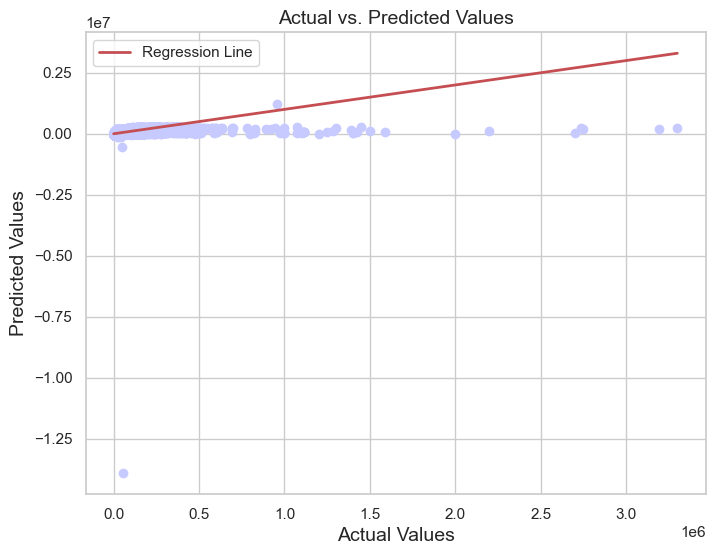

In [ ]:
# Code reference link: https://stackoverflow.com/questions/58663739/reshape-your-data-either-using-array-reshape-1-1-if-your-data-has-a-single-fe
# Code reference link: https://seaborn.pydata.org/tutorial/aesthetics.html
# Code reference link: https://www.w3schools.com/python/matplotlib_scatter.asp

# Plotting the actual vs predicted values with a regression line
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#C7CAFF')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label='Regression Line')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=14)
# Set the style to whitegrid
sns.set(style="whitegrid")
plt.legend()
plt.show()

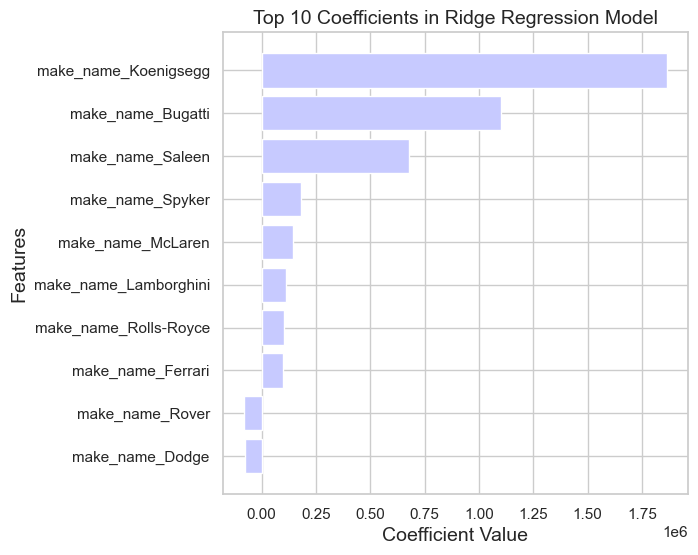

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# get coefficients
coefficients = model.coef_

# select top 10 coefficients
top_indices = np.argsort(np.abs(coefficients))[-10:]
top_coefficients = coefficients[top_indices]
top_feature_names = np.array(one_hot_encoded_data.columns.tolist())[top_indices]

# plot the coefficients
plt.figure(figsize=(6, 6))
plt.barh(range(10), top_coefficients, color='#C7CAFF')
plt.yticks(range(10), top_feature_names)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Coefficients in Ridge Regression Model', fontsize=14)
plt.show()


## Model and Evaluation (with numeric columns)

In [ ]:
# # only numeric
# X_features = ['mileage', 'engine_displacement', 'power', 'torque', 'year', 'fuel_tank_volume', 'height', 'longitude', 'daysonmarket', 'latitude', 'length', 'width', 'back_legroom', 'city_fuel_economy',
#               'front_legroom', 'highway_fuel_economy', 'owner_count', 'wheelbase']
# X = one_hot_encoded_data[X_features]

# df_numeric = df.select_dtypes(include = ['float64', 'int64'], exclude=['object'])
# y = df_numeric["price"]
# print(X.columns.tolist())

# # split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# print(X_train.head())


# X_features = ['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'latitude', 'length', 'longitude', 'mileage', 'owner_count', 'power', 'torque', 'wheelbase', 'width', 'year',
#               'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon',
#               'franchise_dealer_False', 'franchise_dealer_True',
#               'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN', 'listing_color_WHITE', 'listing_color_YELLOW',
#               'make_name_AM General', 'make_name_AMC', 'make_name_Acura', 'make_name_Alfa Romeo', 'make_name_Allard', 'make_name_Ariel', 'make_name_Aston Martin', 'make_name_Audi', 'make_name_Austin', 'make_name_Austin-Healey', 'make_name_BMW', 'make_name_Bentley', 'make_name_Bricklin', 'make_name_Bugatti', 'make_name_Buick', 'make_name_Cadillac', 'make_name_Chevrolet', 'make_name_Chrysler', 'make_name_Clenet', 'make_name_Daewoo', 'make_name_Datsun', 'make_name_DeLorean', 'make_name_DeSoto', 'make_name_DeTomaso', 'make_name_Dodge', 'make_name_Eagle', 'make_name_Edsel', 'make_name_FIAT', 'make_name_Ferrari', 'make_name_Fisker', 'make_name_Ford', 'make_name_Franklin', 'make_name_Freightliner', 'make_name_GMC', 'make_name_Genesis', 'make_name_Geo', 'make_name_Hillman', 'make_name_Honda', 'make_name_Hudson', 'make_name_Humber', 'make_name_Hummer', 'make_name_Hyundai', 'make_name_INFINITI', 'make_name_International Harvester', 'make_name_Isuzu', 'make_name_Jaguar', 'make_name_Jeep', 'make_name_Jensen', 'make_name_Kaiser', 'make_name_Karma', 'make_name_Kia', 'make_name_Koenigsegg', 'make_name_Lamborghini', 'make_name_Land Rover', 'make_name_Lexus', 'make_name_Lincoln', 'make_name_Lotus', 'make_name_MG', 'make_name_MINI', 'make_name_Maserati', 'make_name_Maybach', 'make_name_Mazda', 'make_name_McLaren', 'make_name_Mercedes-Benz', 'make_name_Mercury', 'make_name_Mitsubishi', 'make_name_Mobility Ventures', 'make_name_Morris', 'make_name_Nash', 'make_name_Nissan', 'make_name_Oldsmobile', 'make_name_Opel', 'make_name_Packard', 'make_name_Pagani', 'make_name_Pininfarina', 'make_name_Plymouth', 'make_name_Pontiac', 'make_name_Porsche', 'make_name_RAM', 'make_name_Rolls-Royce', 'make_name_Rover', 'make_name_SRT', 'make_name_Saab', 'make_name_Saleen', 'make_name_Saturn', 'make_name_Scion', 'make_name_Shelby', 'make_name_Spyker', 'make_name_Studebaker', 'make_name_Subaru', 'make_name_Sunbeam', 'make_name_Suzuki', 'make_name_Tesla', 'make_name_Toyota', 'make_name_Triumph', 'make_name_VPG', 'make_name_Volkswagen', 'make_name_Volvo', 'make_name_Willys', 'make_name_smart',
#               'wheel_system_4WD', 'wheel_system_4X2', 'wheel_system_AWD', 'wheel_system_FWD', 'wheel_system_RWD']

In [ ]:
# # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# # train
# model = Ridge(alpha=0.01, random_state=42)
# model.fit(X_train, y_train)

# # predictions
# y_pred = model.predict(X_test)
# y_pred

In [ ]:
# # Ref: https://realpython.com/linear-regression-in-python/
# r_sq = model.score(X_test, y_test)
# print(f"Coefficient of determination: {r_sq}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MSE = metrics.mean_squared_error(y_test,y_pred)
# print(f"Mean Squared Error: {MSE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MAE = metrics.mean_absolute_error(y_test,y_pred)
# print(f"Mean Absolute Error: {MAE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
# print(f"Root Mean Squared Error: {RMSE}")

## Model and Evaluation (partial columns)

In [ ]:
# # removed front leg room, back legroom, latitude, longitude, is_franchise
# X_features = ['city_fuel_economy', 'daysonmarket', 'engine_displacement', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'length', 'mileage', 'owner_count', 'power', 'torque', 'wheelbase', 'width', 'year',
#               'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon',
#               'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN', 'listing_color_WHITE', 'listing_color_YELLOW',
#               'make_name_AM General', 'make_name_AMC', 'make_name_Acura', 'make_name_Alfa Romeo', 'make_name_Allard', 'make_name_Ariel', 'make_name_Aston Martin', 'make_name_Audi', 'make_name_Austin', 'make_name_Austin-Healey', 'make_name_BMW', 'make_name_Bentley', 'make_name_Bricklin', 'make_name_Bugatti', 'make_name_Buick', 'make_name_Cadillac', 'make_name_Chevrolet', 'make_name_Chrysler', 'make_name_Clenet', 'make_name_Daewoo', 'make_name_Datsun', 'make_name_DeLorean', 'make_name_DeSoto', 'make_name_DeTomaso', 'make_name_Dodge', 'make_name_Eagle', 'make_name_Edsel', 'make_name_FIAT', 'make_name_Ferrari', 'make_name_Fisker', 'make_name_Ford', 'make_name_Franklin', 'make_name_Freightliner', 'make_name_GMC', 'make_name_Genesis', 'make_name_Geo', 'make_name_Hillman', 'make_name_Honda', 'make_name_Hudson', 'make_name_Humber', 'make_name_Hummer', 'make_name_Hyundai', 'make_name_INFINITI', 'make_name_International Harvester', 'make_name_Isuzu', 'make_name_Jaguar', 'make_name_Jeep', 'make_name_Jensen', 'make_name_Kaiser', 'make_name_Karma', 'make_name_Kia', 'make_name_Koenigsegg', 'make_name_Lamborghini', 'make_name_Land Rover', 'make_name_Lexus', 'make_name_Lincoln', 'make_name_Lotus', 'make_name_MG', 'make_name_MINI', 'make_name_Maserati', 'make_name_Maybach', 'make_name_Mazda', 'make_name_McLaren', 'make_name_Mercedes-Benz', 'make_name_Mercury', 'make_name_Mitsubishi', 'make_name_Mobility Ventures', 'make_name_Morris', 'make_name_Nash', 'make_name_Nissan', 'make_name_Oldsmobile', 'make_name_Opel', 'make_name_Packard', 'make_name_Pagani', 'make_name_Pininfarina', 'make_name_Plymouth', 'make_name_Pontiac', 'make_name_Porsche', 'make_name_RAM', 'make_name_Rolls-Royce', 'make_name_Rover', 'make_name_SRT', 'make_name_Saab', 'make_name_Saleen', 'make_name_Saturn', 'make_name_Scion', 'make_name_Shelby', 'make_name_Spyker', 'make_name_Studebaker', 'make_name_Subaru', 'make_name_Sunbeam', 'make_name_Suzuki', 'make_name_Tesla', 'make_name_Toyota', 'make_name_Triumph', 'make_name_VPG', 'make_name_Volkswagen', 'make_name_Volvo', 'make_name_Willys', 'make_name_smart',
#               'wheel_system_4WD', 'wheel_system_4X2', 'wheel_system_AWD', 'wheel_system_FWD', 'wheel_system_RWD']

# X = one_hot_encoded_data[X_features]

# df_numeric = df.select_dtypes(include = ['float64', 'int64'], exclude=['object'])
# y = df_numeric["price"]
# print(X.columns.tolist())

# # split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# print(X_train.head())

In [ ]:
# # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# # train
# model = Ridge(alpha=0.01, random_state=42)
# model.fit(X_train, y_train)

# # predictions
# y_pred = model.predict(X_test)
# y_pred

In [ ]:
# # Ref: https://realpython.com/linear-regression-in-python/
# r_sq = model.score(X_test, y_test)
# print(f"Coefficient of determination: {r_sq}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MSE = metrics.mean_squared_error(y_test,y_pred)
# print(f"Mean Squared Error: {MSE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MAE = metrics.mean_absolute_error(y_test,y_pred)
# print(f"Mean Absolute Error: {MAE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
# print(f"Root Mean Squared Error: {RMSE}")

## Model and Evaluation (partial columns)

In [ ]:
# # removed front leg room, back legroom, latitude, longitude, is_franchise, width, height, year, length, daysonmarket
# X_features = ['city_fuel_economy', 'daysonmarket', 'engine_displacement', 'fuel_tank_volume', 'highway_fuel_economy',  'mileage', 'owner_count', 'power', 'torque', 'wheelbase',
#               'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon',
#               'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_TEAL', 'listing_color_UNKNOWN', 'listing_color_WHITE', 'listing_color_YELLOW',
#               'make_name_AM General', 'make_name_AMC', 'make_name_Acura', 'make_name_Alfa Romeo', 'make_name_Allard', 'make_name_Ariel', 'make_name_Aston Martin', 'make_name_Audi', 'make_name_Austin', 'make_name_Austin-Healey', 'make_name_BMW', 'make_name_Bentley', 'make_name_Bricklin', 'make_name_Bugatti', 'make_name_Buick', 'make_name_Cadillac', 'make_name_Chevrolet', 'make_name_Chrysler', 'make_name_Clenet', 'make_name_Daewoo', 'make_name_Datsun', 'make_name_DeLorean', 'make_name_DeSoto', 'make_name_DeTomaso', 'make_name_Dodge', 'make_name_Eagle', 'make_name_Edsel', 'make_name_FIAT', 'make_name_Ferrari', 'make_name_Fisker', 'make_name_Ford', 'make_name_Franklin', 'make_name_Freightliner', 'make_name_GMC', 'make_name_Genesis', 'make_name_Geo', 'make_name_Hillman', 'make_name_Honda', 'make_name_Hudson', 'make_name_Humber', 'make_name_Hummer', 'make_name_Hyundai', 'make_name_INFINITI', 'make_name_International Harvester', 'make_name_Isuzu', 'make_name_Jaguar', 'make_name_Jeep', 'make_name_Jensen', 'make_name_Kaiser', 'make_name_Karma', 'make_name_Kia', 'make_name_Koenigsegg', 'make_name_Lamborghini', 'make_name_Land Rover', 'make_name_Lexus', 'make_name_Lincoln', 'make_name_Lotus', 'make_name_MG', 'make_name_MINI', 'make_name_Maserati', 'make_name_Maybach', 'make_name_Mazda', 'make_name_McLaren', 'make_name_Mercedes-Benz', 'make_name_Mercury', 'make_name_Mitsubishi', 'make_name_Mobility Ventures', 'make_name_Morris', 'make_name_Nash', 'make_name_Nissan', 'make_name_Oldsmobile', 'make_name_Opel', 'make_name_Packard', 'make_name_Pagani', 'make_name_Pininfarina', 'make_name_Plymouth', 'make_name_Pontiac', 'make_name_Porsche', 'make_name_RAM', 'make_name_Rolls-Royce', 'make_name_Rover', 'make_name_SRT', 'make_name_Saab', 'make_name_Saleen', 'make_name_Saturn', 'make_name_Scion', 'make_name_Shelby', 'make_name_Spyker', 'make_name_Studebaker', 'make_name_Subaru', 'make_name_Sunbeam', 'make_name_Suzuki', 'make_name_Tesla', 'make_name_Toyota', 'make_name_Triumph', 'make_name_VPG', 'make_name_Volkswagen', 'make_name_Volvo', 'make_name_Willys', 'make_name_smart',
#               'wheel_system_4WD', 'wheel_system_4X2', 'wheel_system_AWD', 'wheel_system_FWD', 'wheel_system_RWD']

# X = one_hot_encoded_data[X_features]

# df_numeric = df.select_dtypes(include = ['float64', 'int64'], exclude=['object'])
# y = df_numeric["price"]
# print(X.columns.tolist())

# # split data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# print(X_train.head())

In [ ]:
# # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# # train
# model = Ridge(alpha=0.01, random_state=42)
# model.fit(X_train, y_train)

# # predictions
# y_pred = model.predict(X_test)
# y_pred

In [ ]:
# # Ref: https://realpython.com/linear-regression-in-python/
# r_sq = model.score(X_test, y_test)
# print(f"Coefficient of determination: {r_sq}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MSE = metrics.mean_squared_error(y_test,y_pred)
# print(f"Mean Squared Error: {MSE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# MAE = metrics.mean_absolute_error(y_test,y_pred)
# print(f"Mean Absolute Error: {MAE}")

In [ ]:
# # Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
# from sklearn import metrics

# RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
# print(f"Root Mean Squared Error: {RMSE}")

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

## Hyperparameter tuning

Iteration 0: Base with 10 decision trees

In [ ]:
# Train the model on the training data
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred

array([14849.6, 37206.4, 14745.1, ...,  9970.5, 50815.6, 15080.6])

Here were some of the hyperparameter tuning done due to runtime reasons, we are displaying only the final selected version so that the code file runs quickly

In [ ]:
# # Code Reference Link: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10]}

In [ ]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor(n_estimators=10)
# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)


Iteration 1: Changing the max depth to 10 and max leaf nodes to 10

In [ ]:
# model = RandomForestRegressor(n_estimators=10, random_state=42, max_depth= 10, max_leaf_nodes=10)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

Iteration 2: Changing the max depth to 20 and max leaf nodes to 20

In [ ]:
# model = RandomForestRegressor(n_estimators=10, random_state=42, max_depth= 20, max_leaf_nodes=20)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

Iteration 3: Changing the max depth to 100 and max leaf nodes to 100

In [ ]:
# model = RandomForestRegressor(n_estimators=10, random_state=42, max_depth= 100, max_leaf_nodes=100)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

Iteration 4: Trying different feature sets - Features were chosen by looking at the feature's importance. These were the chosen features: 'mileage', 'engine_displacement', 'power', 'torque', 'year', 'fuel_tank_volume', 'height', 'longitude', 'daysonmarket', 'latitude', 'length', 'width', 'back_legroom'. Changing the feature set means you need to change the one-hot encoding

In [ ]:
# # Code Reference Link: https://www.geeksforgeeks.org/random-forest-regression-in-python/
# # Create a new dataframe with only the training data
# # Drop non-numeric columns (temporary approach for simplicity)
# df_numeric = df.select_dtypes(include = ['float64', 'int64'], exclude=['object'])
# # print(df_numeric.dtypes)
# print(df_numeric.columns.to_list())
# # Extracting y (dependent variable)
# y = df_numeric["price"]

# one_hot_encoded_data = one_hot_encoded_data.drop('price', axis=1)
# # print(df_numeric)
# print(one_hot_encoded_data.columns.to_list())
# # numeric_columns = list(df_numeric.columns.tolist())
# # one_hot_columns = list(one_hot_encoded_data.columns.tolist())
# # X = one_hot_encoded_data

# X_features = ['mileage', 'engine_displacement', 'power', 'torque', 'year', 'fuel_tank_volume', 'height', 'longitude', 'daysonmarket', 'latitude', 'length', 'width', 'back_legroom']
# X = one_hot_encoded_data[X_features]

# print(X.columns.tolist())

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# print(X_train.head())


In [ ]:
# # Train the model on the training data
# model = RandomForestRegressor(n_estimators=10, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# y_pred

Iteration 5: Trying different feature sets - Features were chosen by manual selection of what I think is important.

In [ ]:
# # Code Reference Link: https://www.geeksforgeeks.org/random-forest-regression-in-python/
# # Create a new dataframe with only the training data
# # Drop non-numeric columns (temporary approach for simplicity)
# df_numeric = df.select_dtypes(include = ['float64', 'int64'], exclude=['object'])
# # print(df_numeric.dtypes)
# print(df_numeric.columns.to_list())
# # Extracting y (dependent variable)
# y = df_numeric["price"]

# one_hot_encoded_data = one_hot_encoded_data.drop('price', axis=1)
# # print(df_numeric)
# print(one_hot_encoded_data.columns.to_list())
# # numeric_columns = list(df_numeric.columns.tolist())
# # one_hot_columns = list(one_hot_encoded_data.columns.tolist())
# # X = one_hot_encoded_data

# X_features = ['mileage', 'engine_displacement', 'power', 'torque', 'year', 'fuel_tank_volume', 'height', 'longitude', 'daysonmarket', 'latitude', 'length', 'width', 'back_legroom', 'city_fuel_economy',
# 'front_legroom', 'highway_fuel_economy', 'owner_count', 'wheelbase', 'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon', 'franchise_dealer_False', 'franchise_dealer_True', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_BROWN', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_ORANGE', 'listing_color_PINK', 'listing_color_PURPLE', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_TEAL',
# 'listing_color_UNKNOWN', 'listing_color_WHITE', 'listing_color_YELLOW','make_name_Volkswagen','make_name_Toyota','make_name_BMW', 'make_name_Bentley', 'make_name_Bugatti', 'make_name_Cadillac', 'make_name_Chevrolet', 'make_name_Chrysler', 'make_name_Ferrari', 'make_name_Ford', 'wheel_system_4WD', 'wheel_system_4X2', 'wheel_system_AWD', 'wheel_system_FWD', 'wheel_system_RWD']
# X = one_hot_encoded_data[X_features]

# print(X.columns.tolist())

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# print(X_train.head())


In [ ]:
# # Train the model on the training data
# model = RandomForestRegressor(n_estimators=10, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# y_pred

Iteration 6: Trying different feature sets - Features were chosen by manual selection of what I think is important.

In [ ]:
# # Code Reference Link: https://www.geeksforgeeks.org/random-forest-regression-in-python/
# # Create a new dataframe with only the training data
# # Drop non-numeric columns (temporary approach for simplicity)
# df_numeric = df.select_dtypes(include = ['float64', 'int64'], exclude=['object'])
# # print(df_numeric.dtypes)
# print(df_numeric.columns.to_list())
# # Extracting y (dependent variable)
# y = df_numeric["price"]

# one_hot_encoded_data = one_hot_encoded_data.drop('price', axis=1)
# # print(df_numeric)
# print(one_hot_encoded_data.columns.to_list())
# # numeric_columns = list(df_numeric.columns.tolist())
# # one_hot_columns = list(one_hot_encoded_data.columns.tolist())
# # X = one_hot_encoded_data

# X_features = ['mileage', 'engine_displacement', 'power', 'torque', 'year', 'fuel_tank_volume', 'height', 'longitude', 'daysonmarket', 'latitude', 'length', 'width', 'back_legroom', 'city_fuel_economy',
# 'front_legroom', 'highway_fuel_economy', 'owner_count', 'wheelbase', 'body_type_Convertible', 'body_type_Coupe', 'body_type_Hatchback']
# X = one_hot_encoded_data[X_features]

# print(X.columns.tolist())

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# print(X_train.head())


In [ ]:
# # Train the model on the training data
# model = RandomForestRegressor(n_estimators=10, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# y_pred

## Evaluations

### Coefficient of determination (R-squared)

In [ ]:
# Code reference link: https://realpython.com/linear-regression-in-python/
r_sq = model.score(X_test, y_test)
print(f"Coefficient of determination: {r_sq}")

Coefficient of determination: 0.843609203742163


### Mean Squared Error (MSE)

In [ ]:
# Code reference link: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

MSE = metrics.mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 60702856.59666816


### Mean Absolute Error (MAE)

In [ ]:
# Code reference link: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {MAE}")

Mean Absolute Error: 2290.228778609245


### Root Mean Squared Error (RMSE)

In [ ]:
# Code reference link: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error: {RMSE}")

Root Mean Squared Error: 7791.2037963762805


## Visualizations

### Feature Importance

In [ ]:
# Code reference link: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

# Assess feature importances
importances = model.feature_importances_

# # Print feature importances
# for feature, importance in zip(X.columns, importances):
#     print(f"{feature}: {importance}")

# Sort the importances in descending order
sorted_indices = importances.argsort()[::-1]

# Number of top features to select
num_top_features = 15

# Select the top features
top_features = X.columns[sorted_indices[:num_top_features]]

# Print the top features
for feature in top_features:
    importance = importances[X.columns.get_loc(feature)]
    print(f"{feature}: {importance}")



mileage: 0.21429573649871
engine_displacement: 0.17484062555868268
power: 0.1238042520997387
torque: 0.06833688252068885
year: 0.06695687778945646
fuel_tank_volume: 0.03989161960439152
height: 0.03183633353072584
longitude: 0.028422030889599628
daysonmarket: 0.020451941053282654
latitude: 0.01917435988069839
length: 0.018696771683216148
make_name_Porsche: 0.018484769081075197
width: 0.014023441334486483
back_legroom: 0.012383166798957007
make_name_Mercedes-Benz: 0.011101092030746522


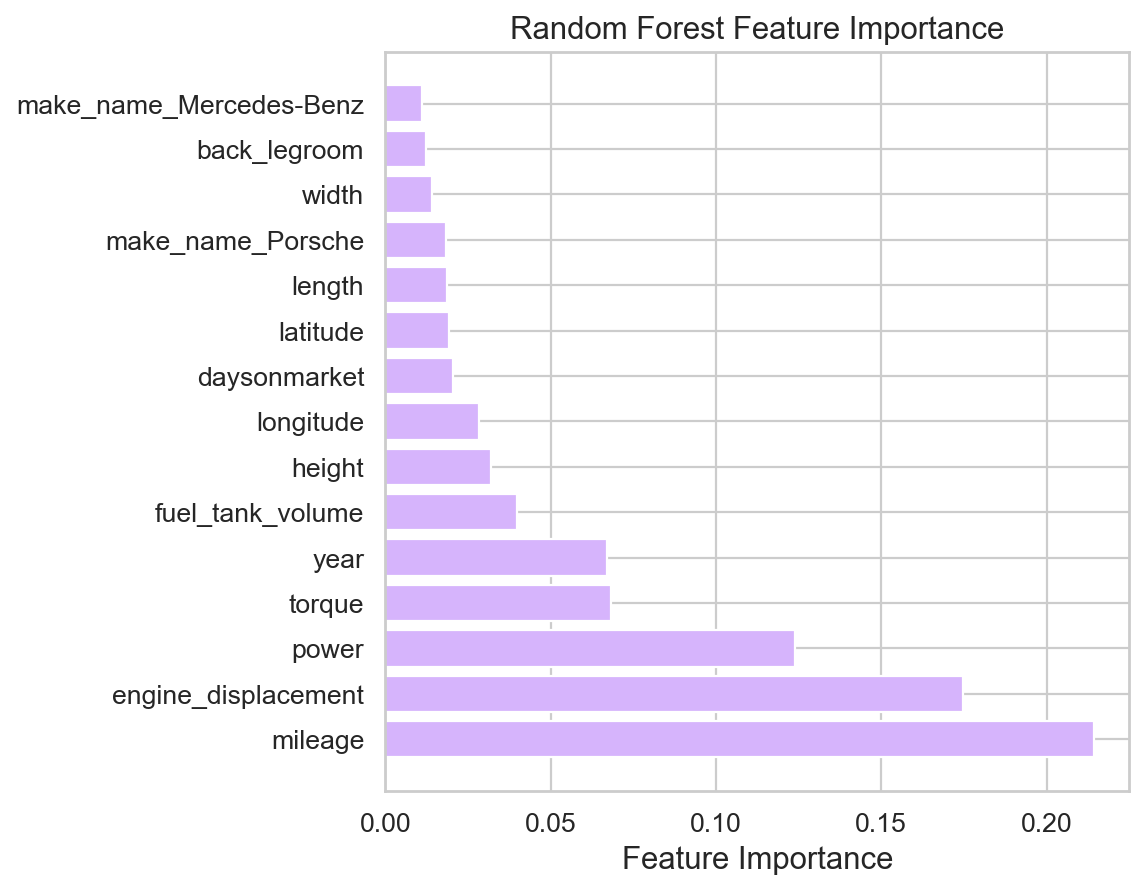

In [ ]:
# Code Reference Link: https://stackoverflow.com/questions/62536918/plot-feature-importance-with-top-10-features-using-matplotlib
# Code Reference Link: https://mljar.com/blog/feature-importance-in-random-forest/

import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_

# Sort the importances in descending order
sorted_indices = importances.argsort()[::-1]

# Number of top features to select
num_top_features = 15

# Select the top features
top_features = X.columns[sorted_indices[:num_top_features]]
top_importances = importances[sorted_indices[:num_top_features]]

# Set the style to whitegrid
sns.set(style="whitegrid")

# Plot the feature importances
plt.figure(figsize=(6, 6), dpi= 160)
plt.barh(range(len(top_features)), top_importances, align='center', color='#D6B4FC')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Random Forest Top {} Feature Importances'.format(num_top_features))
plt.title('Random Forest Feature Importance', fontsize=14)
plt.show()

### Actual vs Predicted Scatterplot

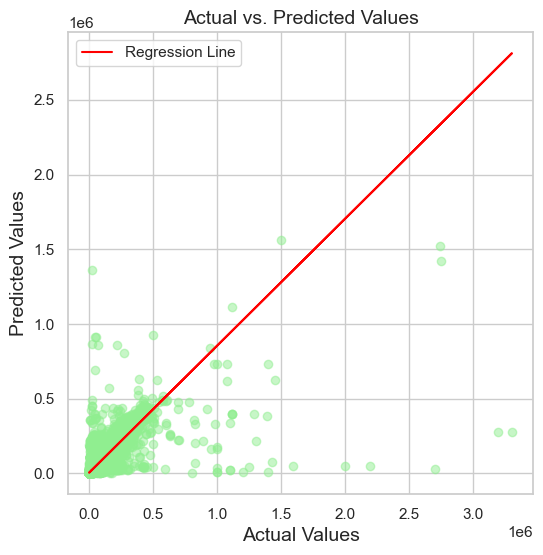

In [ ]:
# Code reference link: https://stackoverflow.com/questions/58663739/reshape-your-data-either-using-array-reshape-1-1-if-your-data-has-a-single-fe
# Code reference link: https://seaborn.pydata.org/tutorial/aesthetics.html
# Code reference link: https://www.w3schools.com/python/matplotlib_scatter.asp

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convert Pandas Series to NumPy array
y_test_np = y_test.values

# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(y_test_np.reshape(-1, 1), y_pred)

# Set the style to whitegrid
sns.set(style="whitegrid")

# Plot actual vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='lightgreen')
# Plot the regression line
plt.plot(y_test, regression_model.predict(y_test_np.reshape(-1, 1)), color='red', label='Regression Line')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs. Predicted Values', fontsize=14)
plt.legend()
plt.show()


# XGBoost

In [ ]:
import pandas as pd

df = pd.read_csv('used_cars_data_v3.csv')
df['back_legroom'] = pd.to_numeric(df['back_legroom'].str.replace(' in', ''), errors='coerce')
df['front_legroom'] = pd.to_numeric(df['front_legroom'].str.replace(' in', ''), errors='coerce')
df['fuel_tank_volume'] = pd.to_numeric(df['fuel_tank_volume'].str.replace(' gal', ''), errors='coerce')
df['height'] = pd.to_numeric(df['height'].str.replace(' in', ''), errors='coerce')
df['length'] = pd.to_numeric(df['length'].str.replace(' in', ''), errors='coerce')
df['wheelbase'] = pd.to_numeric(df['wheelbase'].str.replace(' in', ''), errors='coerce')
df['width'] = pd.to_numeric(df['width'].str.replace(' in', ''), errors='coerce')
df['power'] = df['power'].str.extract('(\d+)').fillna(0).astype(int)
df['torque'] = df['torque'].str.extract('(\d+)').fillna(0).astype(int)

In [ ]:
# replace NaN values in fleet, frame_damaged, isCab, salvage, theft_title with false
bool_cols = ['fleet', 'frame_damaged', 'isCab', 'salvage', 'theft_title']
for col in bool_cols:
  df[col] = df[col].fillna(False)

/var/folders/__/xjk366sx01q2mmm4b5z1t0y00000gn/T/ipykernel_71627/2224772309.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(False)


In [ ]:
df = df.drop(columns=['horsepower', 'engine_type', 'transmission', 'franchise_make', 'fuel_type', 'fleet', 'frame_damaged', 'isCab', 'salvage', 'theft_title', 'is_new', 'maximum_seating'])

## XGBoost

## One-hot encoding

In [ ]:
## FEATURE SUBSETS FOR ITERATION 2,3,4
## NOTE: updating the features means you also have to change the specific_columns array which comes after

# ITERATION 1
# # List of features to keep
# features_to_keep = [
#     'power',
#     'mileage',
#     'engine_displacement',
#     'fuel_tank_volume',
#     'width',
#     'torque',
#     'year',
#     'height',
#     'back_legroom',
#     'front_legroom',
#     'price',
# ]

# # Keep only the specified features in the DataFrame
# df = df[features_to_keep]

# ITERATION 2
# List of columns to keep
# columns_to_keep = [
#     'year',
#     'height',
#     'back_legroom',
#     'front_legroom',
#     'wheelbase',
#     'length',
#     'owner_count',
#     'highway_fuel_economy',
#     'city_fuel_economy',
#     'price',
# ]

# # Keep only the specified columns in the DataFrame
# df = df[columns_to_keep]

# # Now, 'df' contains only the specified columns

# ITERATION 3
# List of columns to keep
# columns_to_keep = [
#     'power',
#     'mileage',
#     'engine_displacement',
#     'fuel_tank_volume',
#     'width',
#     'price'
# ]

# # Keep only the specified columns in the DataFrame
# df = df[columns_to_keep]

In [ ]:
# # Ref: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
from math import ceil

# Define batch size
batch_size = 1000

# Get the total number of batches
num_batches = ceil(len(df) / batch_size)

# Process each batch
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size if (i + 1) * batch_size < len(df) else len(df)

    # Extract the current batch
    current_batch = df.iloc[start_idx:end_idx, :]

    # Perform one-hot encoding on the current batch
    one_hot_encoded_batch = pd.get_dummies(current_batch, columns=current_batch.select_dtypes(include=['bool', 'object']).columns)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


In [ ]:
# one_hot_encoded_data.columns[one_hot_encoded_data.isna().any()].tolist()
one_hot_encoded_data = one_hot_encoded_batch

In [ ]:
specific_columns = ['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'length',
 'mileage',
 'owner_count',
 'wheelbase',
 'width']
data_types = one_hot_encoded_data[specific_columns].dtypes
data_types

back_legroom            float64
city_fuel_economy       float64
engine_displacement     float64
front_legroom           float64
fuel_tank_volume        float64
height                  float64
highway_fuel_economy    float64
length                  float64
mileage                 float64
owner_count             float64
wheelbase               float64
width                   float64
dtype: object

In [ ]:
# Define the specific columns
specific_columns = ['back_legroom',
 'city_fuel_economy',
 'engine_displacement',
 'front_legroom',
 'fuel_tank_volume',
 'height',
 'highway_fuel_economy',
 'length',
 'mileage',
 'owner_count',
 'wheelbase',
 'width']

# Calculate the mean of each selected column
column_means = one_hot_encoded_data[specific_columns].mean()

# Replace null values in each selected column with its respective mean
one_hot_encoded_data[specific_columns] = one_hot_encoded_data[specific_columns].fillna(column_means)

# Check if there are any null values left
print(one_hot_encoded_data.isnull().any().tolist())

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


### Combining the numeric and categorical

In [ ]:
# Create a new dataframe with only the training data
# Drop non-numeric columns (temporary approach for simplicity)
df_numeric = df.select_dtypes(include = ['float64', 'int64'], exclude=['object'])
# print(df_numeric.dtypes)
# print(df_numeric.columns.to_list())
# Extracting y (dependent variable)
y = df_numeric["price"]

df_numeric = df.drop('price', axis=1)
one_hot_encoded_data = one_hot_encoded_data.drop('price', axis=1)
# print(df_numeric)
print(one_hot_encoded_data.columns.to_list())
# numeric_columns = list(df_numeric.columns.tolist())
one_hot_columns = list(one_hot_encoded_data.columns.tolist())
X = one_hot_encoded_data

# print(X.columns.tolist())

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# # print(X_train.head())

# # # Train the model on the training data
# model = LinearRegression().fit(X_train, y_train)

# # # Make predictions on the test set
# y_pred = model.predict(X_test)
# y_pred

['back_legroom', 'city_fuel_economy', 'daysonmarket', 'engine_displacement', 'front_legroom', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'latitude', 'length', 'longitude', 'mileage', 'owner_count', 'power', 'torque', 'wheelbase', 'width', 'year', 'body_type_Coupe', 'body_type_Hatchback', 'body_type_Minivan', 'body_type_Pickup Truck', 'body_type_SUV / Crossover', 'body_type_Sedan', 'body_type_Van', 'body_type_Wagon', 'franchise_dealer_False', 'franchise_dealer_True', 'listing_color_BLACK', 'listing_color_BLUE', 'listing_color_GOLD', 'listing_color_GRAY', 'listing_color_GREEN', 'listing_color_RED', 'listing_color_SILVER', 'listing_color_UNKNOWN', 'listing_color_WHITE', 'make_name_BMW', 'make_name_Buick', 'make_name_Chevrolet', 'make_name_Dodge', 'make_name_FIAT', 'make_name_Ford', 'make_name_Jaguar', 'make_name_Jeep', 'make_name_MINI', 'make_name_Nissan', 'make_name_Scion', 'make_name_Subaru', 'make_name_Toyota', 'make_name_Volkswagen', 'wheel_system_4WD', 'wheel_system_AWD', 

## XGBoost Model Code

In [ ]:
# REFERENCE: https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import numpy as np

df_numeric = df.select_dtypes(include=['float64', 'int64'], exclude=['object'])

# Extracting y (dependent variable)
y = df_numeric["price"]

# Drop the target variable from df_numeric
df_numeric = df_numeric.drop('price', axis=1)

# One-hot encode the remaining categorical columns
one_hot_encoded_data = pd.get_dummies(df_numeric)

# Extract the column names for later reference
one_hot_columns = list(one_hot_encoded_data.columns)

# Assign one-hot encoded data to X
X = one_hot_encoded_data.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# Specify XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'colsample_bytree': 0.8,
    'learning_rate': 0.01,
    'max_depth': 5,
    'alpha': 10,
    'n_estimators': 100
}

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model on the training data
num_round = 50  # The num_round parameter controls the number of boosting rounds or iterations. This training process is performed in batches, with each batch represented by a subset of the training data.
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


/Users/meenakshiandoorveedu/Desktop/4B - Winter 2024/MSCI 546/Project/venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error: 235901549.88790423


## Evaluations

### Feature Importance

In [ ]:
# Extract the column names for later reference
one_hot_columns = list(one_hot_encoded_data.columns)

# Get feature importances
feature_importances = model.get_score(importance_type='weight')

# Map feature indices to column names
feature_importances = {one_hot_columns[int(k[1:])]: v for k, v in feature_importances.items()}

# Sort the features by importance
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Output the most important features with column names
print("Most Important Features:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Most Important Features:
power: 245.0
mileage: 163.0
torque: 156.0
width: 156.0
fuel_tank_volume: 126.0
year: 126.0
engine_displacement: 124.0
front_legroom: 100.0
height: 95.0
back_legroom: 75.0
wheelbase: 55.0
length: 53.0
owner_count: 32.0
highway_fuel_economy: 16.0
city_fuel_economy: 15.0
longitude: 7.0
daysonmarket: 1.0


In [ ]:
# Extract the column names for later reference
one_hot_columns = list(one_hot_encoded_data.columns)

# Get feature importances
feature_importances = model.get_score(importance_type='gain')

# Map feature indices to column names
feature_importances = {one_hot_columns[int(k[1:])]: v for k, v in feature_importances.items()}

# Sort the features by importance
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Output the most important features with column names
print("Most Important Features:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Most Important Features:
mileage: 14817470447616.0
fuel_tank_volume: 13412477173760.0
power: 6101264760832.0
owner_count: 6029207666688.0
engine_displacement: 5918574510080.0
torque: 5248590544896.0
year: 4677990612992.0
front_legroom: 3576182341632.0
height: 3365851103232.0
length: 2345782214656.0
back_legroom: 1280524288000.0
width: 1162893197312.0
wheelbase: 1037836615680.0
city_fuel_economy: 581509513216.0
highway_fuel_economy: 525796573184.0
longitude: 56453074944.0
daysonmarket: 49627381760.0


### Coefficient of determination (R^2)

In [ ]:
from sklearn.metrics import r2_score
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"Coefficient of determination (R-squared): {r_squared}")

Coefficient of determination (R-squared): 0.3922389605063141


### Mean Squared Error (MSE)

In [ ]:
# Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

MSE = metrics.mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {MSE}")

Mean Squared Error: 235901549.88790423


### Mean Absolute Error (MAE)

In [ ]:
# Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {MAE}")

Mean Absolute Error: 9061.312666501617


### Root Mean Squared Error (RMSE)

In [ ]:
# Ref: https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error: {RMSE}")

Root Mean Squared Error: 15359.086883272203


### Cross Validation

In [ ]:
# Perform cross-validation using KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with XGBoost
num_boost_round = 150  # Adjust the number of boosting rounds
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    metrics=["rmse", "mae"],  # You can use other metrics if needed
    folds=kf
)

# Find the best number of boosting rounds
best_num_rounds = cv_results.shape[0]
print(f"Best number of boosting rounds: {best_num_rounds}")

# Retrain the model using the best number of boosting rounds
model = xgb.train(params, dtrain, num_boost_round=best_num_rounds)


/Users/meenakshiandoorveedu/Desktop/4B - Winter 2024/MSCI 546/Project/venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/meenakshiandoorveedu/Desktop/4B - Winter 2024/MSCI 546/Project/venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/meenakshiandoorveedu/Desktop/4B - Winter 2024/MSCI 546/Project/venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Best number of boosting rounds: 150


/Users/meenakshiandoorveedu/Desktop/4B - Winter 2024/MSCI 546/Project/venv/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:41:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(dtest)

# Calculate metrics for cross-validated predictions
cv_mse = mean_squared_error(y_test, y_pred)
cv_rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)  # RMSE
cv_mae = metrics.mean_absolute_error(y_test, y_pred)
cv_r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Cross-validated Mean Squared Error: {cv_mse}')
print(f'Cross-validated Root Mean Squared Error: {cv_rmse}')
print(f'Cross-validated Mean Absolute Error: {cv_mae}')
print(f'Cross-validated R-squared: {cv_r2}')

Cross-validated Mean Squared Error: 138054782.50366354
Cross-validated Root Mean Squared Error: 11749.671591311118
Cross-validated Mean Absolute Error: 5934.801840835944
Cross-validated R-squared: 0.6443248543243105


/Users/meenakshiandoorveedu/Desktop/4B - Winter 2024/MSCI 546/Project/venv/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


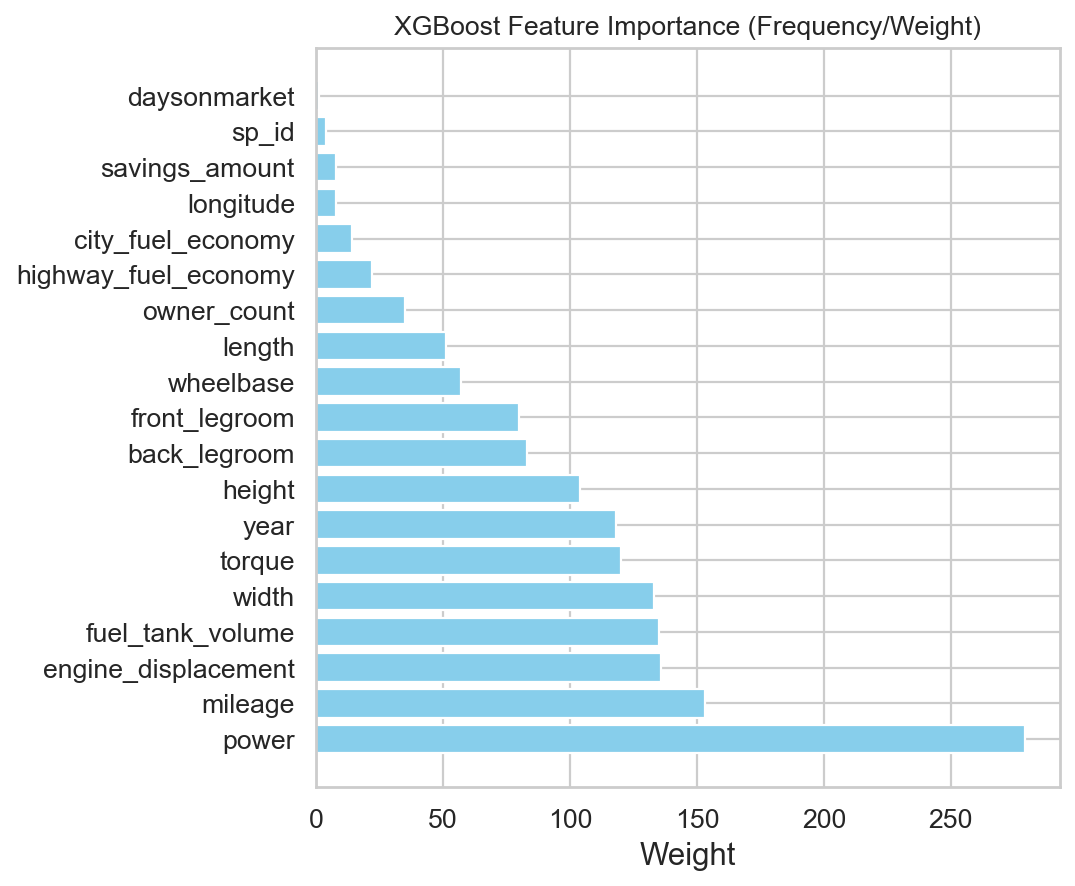

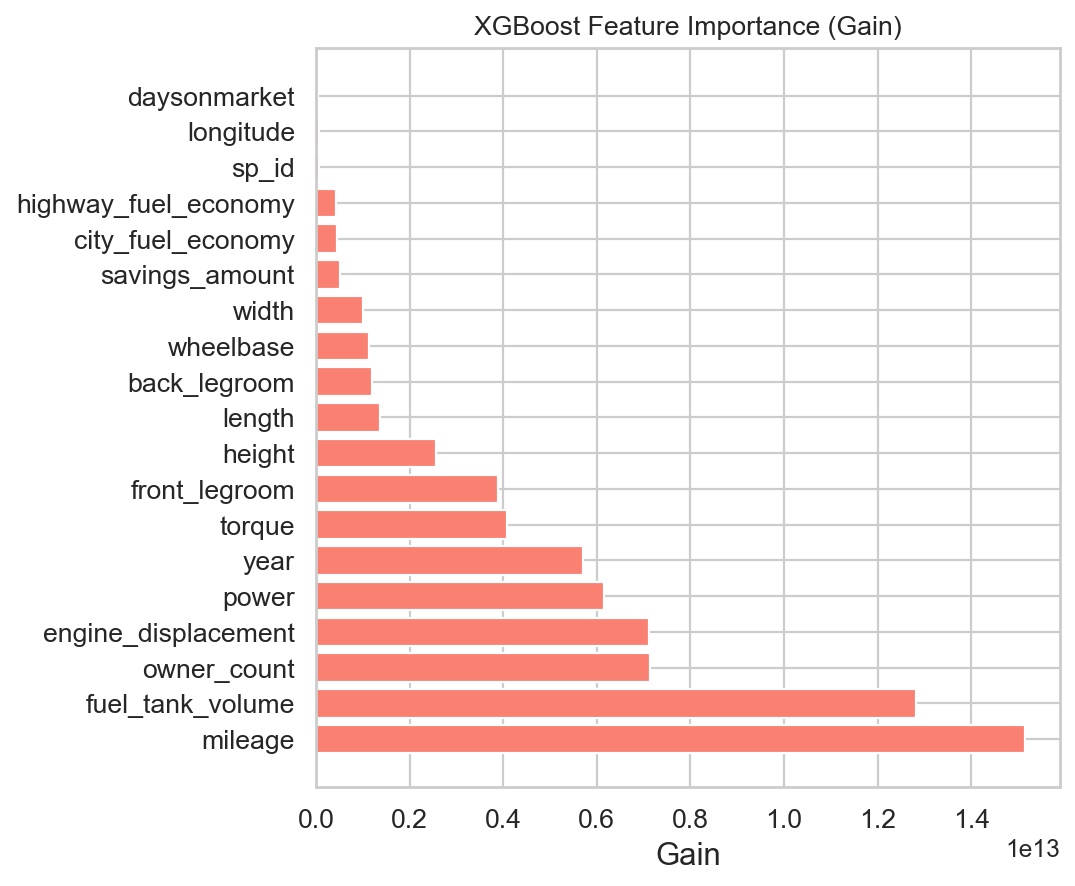

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# REFERENCE: https://seaborn.pydata.org/tutorial/aesthetics.html
# Set the style to whitegrid
sns.set(style="whitegrid")

# Feature Importance (weight)
features_weight = ['power', 'mileage', 'engine_displacement', 'fuel_tank_volume', 'width', 'torque', 'year',
                    'height', 'back_legroom', 'front_legroom', 'wheelbase', 'length', 'owner_count',
                    'highway_fuel_economy', 'city_fuel_economy', 'longitude', 'savings_amount', 'sp_id', 'daysonmarket']

weights = [279.0, 153.0, 136.0, 135.0, 133.0, 120.0, 118.0, 104.0, 83.0, 80.0, 57.0, 51.0, 35.0, 22.0, 14.0, 8.0, 8.0, 4.0, 1.0]

# Feature Importance (Gain)
features_gain = ['mileage', 'fuel_tank_volume', 'owner_count', 'engine_displacement', 'power', 'year', 'torque',
                  'front_legroom', 'height', 'length', 'back_legroom', 'wheelbase', 'width', 'savings_amount',
                  'city_fuel_economy', 'highway_fuel_economy', 'sp_id', 'longitude', 'daysonmarket']

gains = [15140857577472.0, 12829939728384.0, 7145324019712.0, 7118065238016.0, 6152988917760.0, 5697762754560.0,
         4073611329536.0, 3891819708416.0, 2573606584320.0, 1371030683648.0, 1201809260544.0, 1130087448576.0,
         996017438720.0, 504778391552.0, 442599276544.0, 426639360000.0, 60339466240.0, 57720262656.0, 49720967168.0]

# Create a bar plot for Feature Importance (By Weight/Frequency)
plt.figure(figsize=(6, 6), dpi= 160)
plt.barh(features_weight, weights, color='skyblue')
plt.xlabel('Weight', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12,)
plt.title('XGBoost Feature Importance (Frequency/Weight)', fontsize=12)
plt.show()

# Create a bar plot for Feature Importance (By Gain)
plt.figure(figsize=(6, 6), dpi=160)
plt.barh(features_gain, gains, color='salmon')
plt.xlabel('Gain', fontsize=14)
plt.title('XGBoost Feature Importance (Gain)', fontsize=12)
# Increase tick label font size
plt.tick_params(axis='both', which='major', labelsize=12,)
plt.show()


# Feed-forward Neural Network

In [ ]:
import pandas as pd
# import back the csv
data = pd.read_csv('used_car_data_v4.csv')

In [ ]:
# normalize data for numeric columns between 0 and 1 with min-max normalization
normalized_data=(data-data.min())/(data.max()-data.min())
print(data["price"].max())
print(data["price"].min())

3299995.0
165.0


In [ ]:
normalized_y = normalized_data["price"]
normalized_x = normalized_data.drop(columns=["price"])

In [ ]:
# y = data["price"]
# x = data.drop(columns=["price"])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_x, normalized_y, test_size=0.6, random_state=546)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=546)

In [ ]:
import torch

# convert the normalized_data into tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# add a second dimension to make them column vectors
y_train_tensor = y_train_tensor.unsqueeze(1)
y_test_tensor = y_test_tensor.unsqueeze(1)

In [ ]:
# Get the input size (number of features)
input_size = X_train_tensor.shape[0]
output_size = y_test_tensor.shape[1]
print("Input size:", input_size)
print("Output size:", output_size)

Input size: 1200016
Output size: 1


In [ ]:
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(149, 200), # 149 input nodes to 200 nodes in the first hidden layer
    nn.ReLU(),        # ReLU activation for first hidden layer
    nn.Linear(200, 100), # 200 nodes from first hidden layer to 100 in the second
    nn.ReLU(),        # ReLU activation for second hidden layer
    nn.Linear(100, 25),  # 100 nodes from second hidden layer to 25 in the third
    nn.ReLU(),        # ReLU activation for third hidden layer
    nn.Linear(25, 1)  # 25 nodes from the third to the output
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [ ]:
print("Min value in y_train_tensor_normalized:", torch.min(X_train_tensor).item())
print("Max value in y_train_tensor_normalized:", torch.max(X_train_tensor).item())
print("Min value in y_test_tensor_normalized:", torch.min(y_train_tensor).item())
print("Max value in y_test_tensor_normalized:", torch.max(y_test_tensor).item())

Min value in y_train_tensor_normalized: 0.0
Max value in y_train_tensor_normalized: 1.0
Min value in y_test_tensor_normalized: 0.0
Max value in y_test_tensor_normalized: 1.0


### Training Loop

In [ ]:
n_epochs = 10
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_pred = model(X_batch)
        y_batch = y_train_tensor[i:i+batch_size]
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 4.82031691717566e-06
Finished epoch 1, latest loss 4.446379989531124e-06
Finished epoch 2, latest loss 4.053794782521436e-06
Finished epoch 3, latest loss 4.111717316845898e-06
Finished epoch 4, latest loss 2.1188845948927337e-06
Finished epoch 5, latest loss 1.074493980013358e-06
Finished epoch 6, latest loss 2.532290181989083e-06
Finished epoch 7, latest loss 2.042507730948273e-06
Finished epoch 8, latest loss 1.5944950746415998e-06
Finished epoch 9, latest loss 1.2927204124935088e-06


In [ ]:
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# max_price = data["price"].max()
# min_price = data["price"].min()
# # Evaluation
# model.eval()
# with torch.no_grad():
#     y_pred = model(X_test_tensor)
#     r2 = r2_score(y_test_tensor, y_pred.numpy())
#     mse = mean_squared_error(y_test_tensor, y_pred.numpy())
#     mae = mean_absolute_error(y_test_tensor, y_pred.numpy())
#     rmse = mse ** 0.5
#     print(f"Mean Squared Error: {mse}")
#     print(f"R^2 Score: {r2}")
#     print(f"Mean Absolute Error: {mae}")
#     print(f"Root Mean Squared Error: {rmse}")

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

max_price = data["price"].max()
min_price = data["price"].min()
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    r2 = r2_score(y_test_tensor, y_pred.numpy())
    # Un-normalize the predicted values
    y_pred_unnormalized = y_pred * (max_price - min_price) + min_price
    # Un-normalize the true values
    y_true_unnormalized = y_test_tensor * (max_price - min_price) + min_price
    mse = mean_squared_error(y_true_unnormalized, y_pred_unnormalized.numpy())
    mae = mean_absolute_error(y_true_unnormalized, y_pred_unnormalized.numpy())
    rmse = mse ** 0.5
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 80625872.0
R^2 Score: 0.7864240532967706
Mean Absolute Error: 3788.41650390625
Root Mean Squared Error: 8979.19105487794


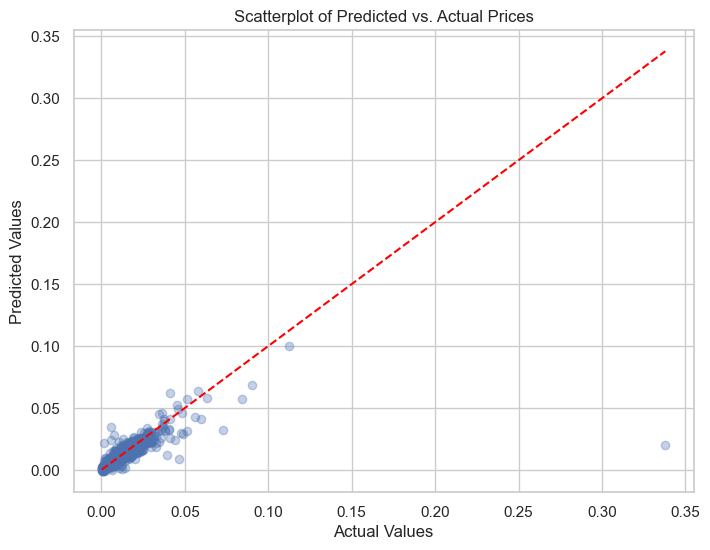

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# downsample the data to 50k for easier plotting
sample_size = 10000
indices = np.random.choice(len(y_true_unnormalized), size=sample_size, replace=False)
y_true_sampled = y_test_tensor[indices]
y_pred_sampled = y_pred[indices]

# scatterplot with predicted=actual line
plt.figure(figsize=(8, 6))
plt.scatter(y_true_sampled, y_pred_sampled, alpha=0.33)
plt.plot([min(y_true_sampled), max(y_true_sampled)], [min(y_true_sampled), max(y_true_sampled)], color='red', linestyle='--')  # Add y=x line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of Predicted vs. Actual Prices')
plt.show()

# Combined Visualizations

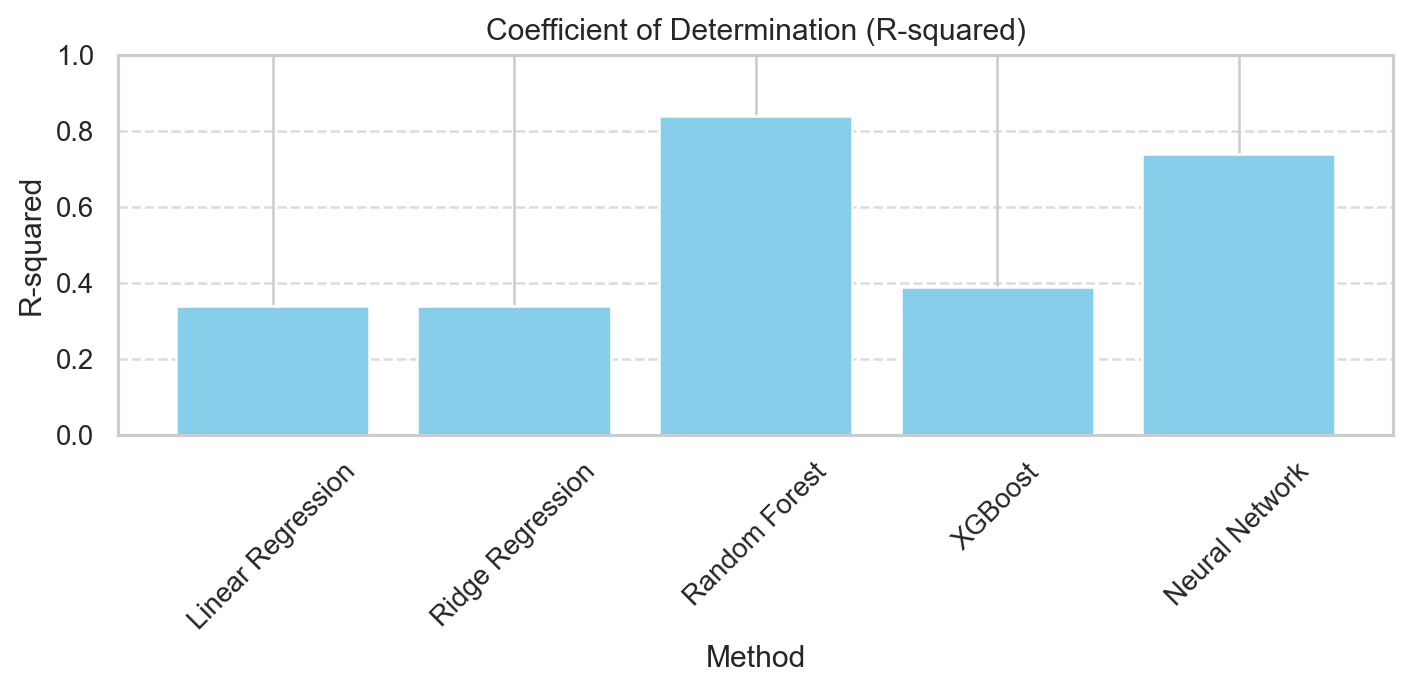

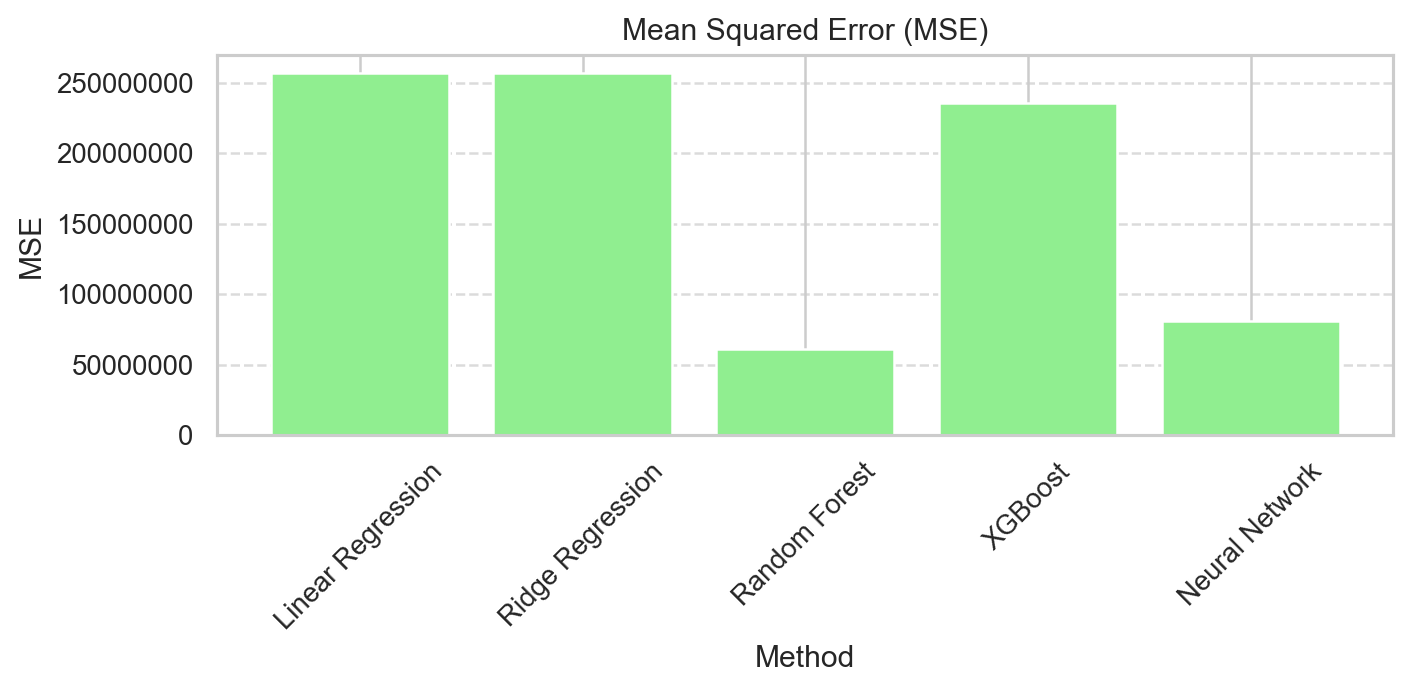

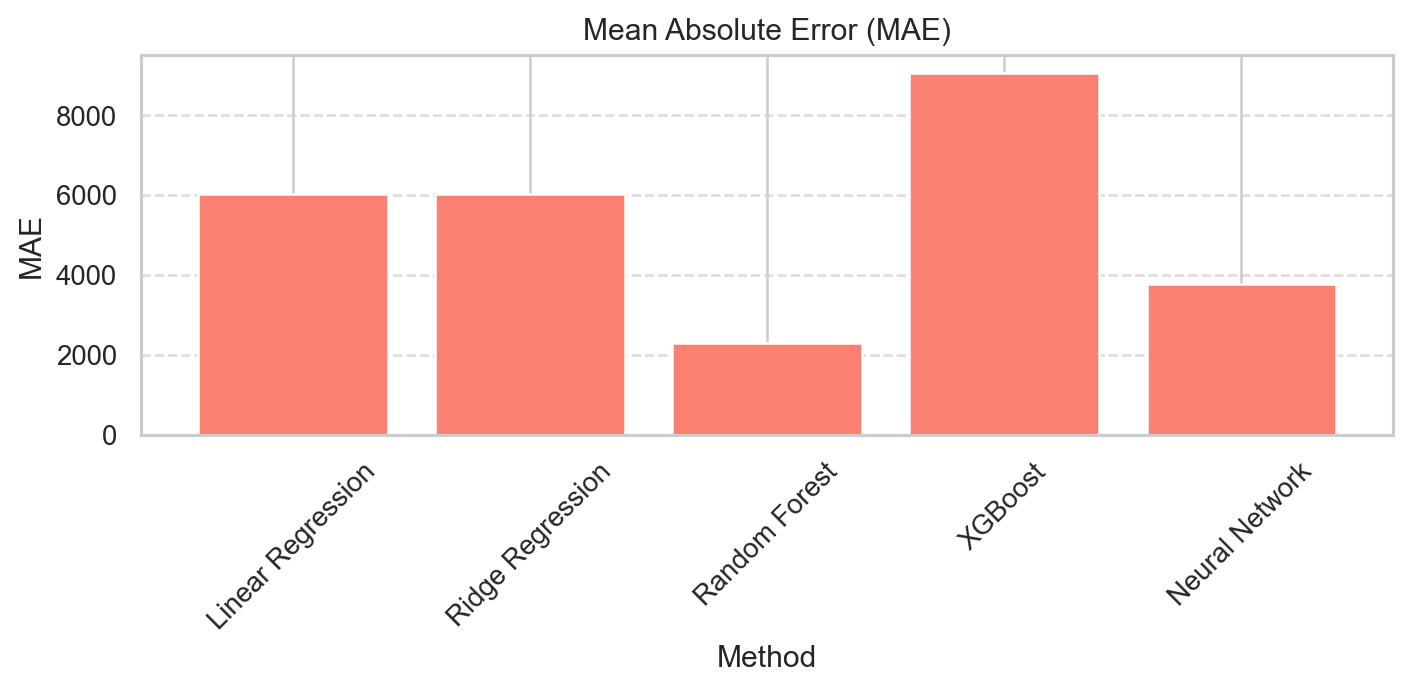

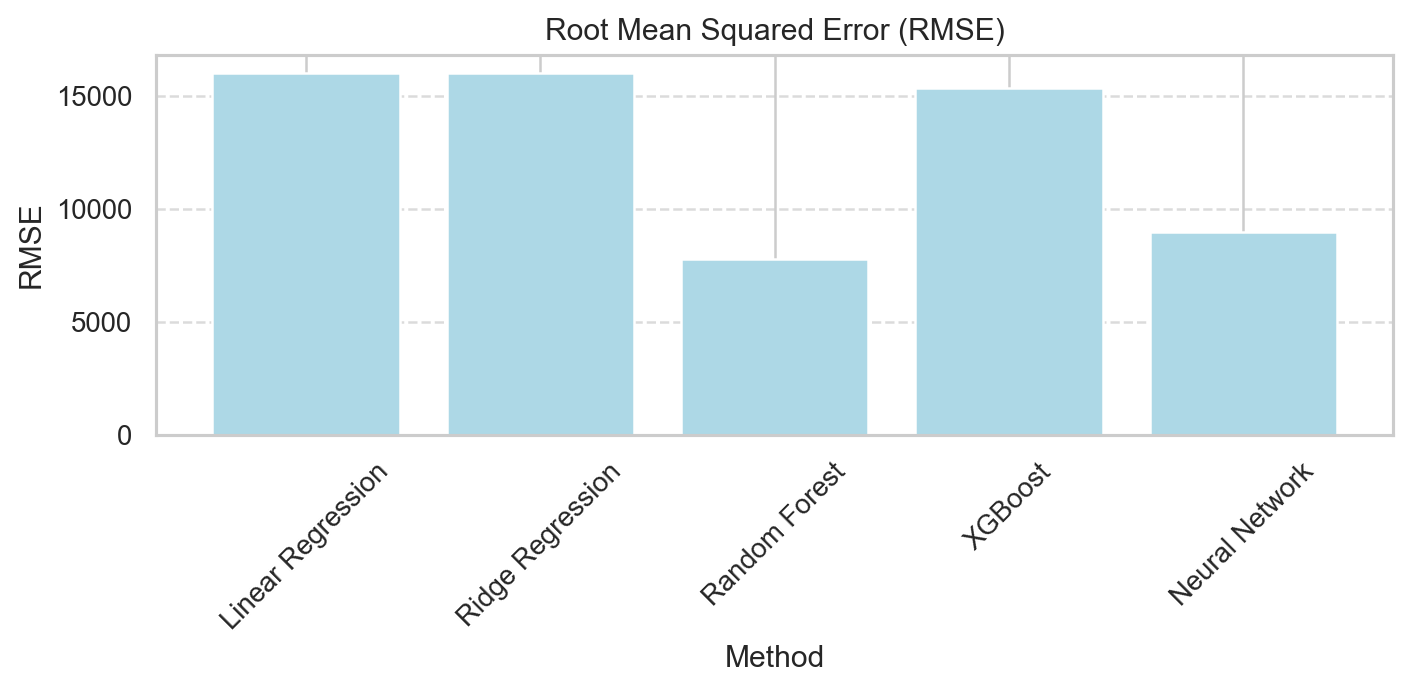

In [ ]:
import matplotlib.pyplot as plt

# Data
methods = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'XGBoost', 'Neural Network']
r_squared = [0.3384, 0.34, 0.84, 0.39, 0.74]
mse = [256894726.68, 257095612.47, 60702856.60, 235901549.89, 80625872.0]
mae = [6029.57, 6030.04, 2290.23, 9061.31, 3788.42]
rmse = [16027.93, 16034.20, 7791.20, 15359.09, 8979.19]

# Plotting Coefficient of Determination (R-squared)
plt.figure(figsize=(8, 4), dpi=180)
plt.bar(methods, r_squared, color='skyblue')
plt.title('Coefficient of Determination (R-squared)')
plt.xlabel('Method')
plt.ylabel('R-squared')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(8, 4), dpi=180)
plt.bar(methods, mse, color='lightgreen')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Method')
plt.ylabel('MSE')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(8, 4), dpi=180)
plt.bar(methods, mae, color='salmon')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Method')
plt.ylabel('MAE')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting Root Mean Squared Error (RMSE)
plt.figure(figsize=(8, 4), dpi=180)
plt.bar(methods, rmse, color='lightblue')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Method')
plt.ylabel('RMSE')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()